In [125]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\MLPR\Project\Codes\dataSets\raw_pe_images.csv')  # Update with your actual file path


In [126]:
# Display the first few rows of the dataset
print(data.head())

                               hash  pix_0  pix_1  pix_2  pix_3  pix_4  pix_5  \
0  b324140e1fb35dc6b694879ba1f2be45     15     15    239     15    223     36   
1  1d32b1326a524b163eb74af645cd34d5    234    196      8     20    182     56   
2  e44fea4913fc9fd91b8b07c4670aeac4    196    255      5     97     35    112   
3  95badb16d862ba94ae85c44e4b31d749    232    252    183     39     51      1   
4  f30f32a4f42678ef49a543356d580232     81     84    204    228    255    157   

   pix_6  pix_7  pix_8  ...  pix_1015  pix_1016  pix_1017  pix_1018  pix_1019  \
0    102    243    102  ...        31       242       245       169       212   
1     27    223    144  ...       189       228       156        54       189   
2    219    189    217  ...       254       189       227       255       192   
3    255     87     94  ...       210        52        55        95       230   
4     76    254    128  ...        24        69        64        53        52   

   pix_1020  pix_1021  pix

In [127]:
# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

Shape of the dataset: (51959, 1026)


In [128]:
# Check for any missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
hash        0
pix_0       0
pix_1       0
pix_2       0
pix_3       0
           ..
pix_1020    0
pix_1021    0
pix_1022    0
pix_1023    0
malware     0
Length: 1026, dtype: int64


Distribution of malware vs. benign files:
malware
1    49376
0     2583
Name: count, dtype: int64


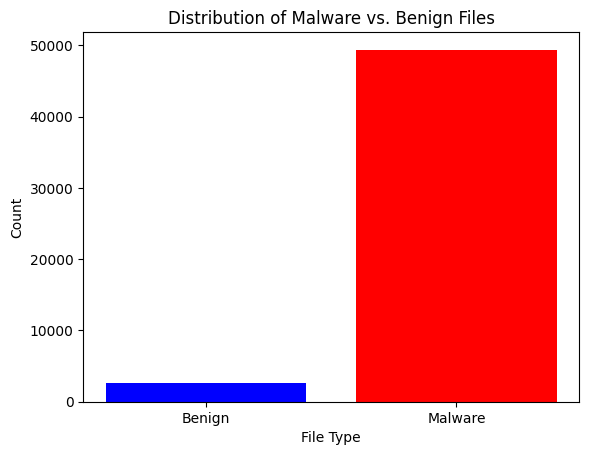

In [129]:
# Check the distribution of malware vs. benign files
print("Distribution of malware vs. benign files:")
print(data['malware'].value_counts())

import matplotlib.pyplot as plt

malware_count = data['malware'].sum()
benign_count = data.shape[0] - malware_count

# Data
labels = ['Benign', 'Malware']
counts = [benign_count, malware_count]

# Plot
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('Distribution of Malware vs. Benign Files')
plt.show()

In [130]:
# Statistical summary of the dataset
print("Statistical summary:")
print(data.describe())

Statistical summary:
              pix_0         pix_1         pix_2         pix_3         pix_4  \
count  51959.000000  51959.000000  51959.000000  51959.000000  51959.000000   
mean      89.734175     99.335784    102.539252     96.763602     99.149368   
std       85.986066     89.268026     89.904768     87.953601     88.083525   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      4.000000      4.000000      4.000000      5.000000   
50%       77.000000     86.000000     93.000000     81.000000     85.000000   
75%      141.000000    180.000000    191.000000    168.000000    165.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

              pix_5         pix_6         pix_7         pix_8         pix_9  \
count  51959.000000  51959.000000  51959.000000  51959.000000  51959.000000   
mean      95.032968     99.202564     98.918109    100.849708     99.085721   
std       86.703939     88.827

In [131]:
import numpy as np

# Reshape the pixel values into a single column
image_data = data.iloc[:, 1:-1]  # Exclude the first column (hash) and the last column (malware)
image_array = np.array(image_data)

# Reshape into images
num_images = image_array.shape[0]
image_size = int(np.sqrt(image_array.shape[1]))  # Assuming square images
reshaped_images = image_array.reshape(num_images, image_size, image_size)

# Now you have a NumPy array (reshaped_images) where each element is a grayscale image
# You can further preprocess or use this data for your machine learning tasks



In [132]:
print(reshaped_images.shape)

(51959, 32, 32)


In [133]:
# Flatten the images for normalization
flattened_images = reshaped_images.reshape(num_images, -1)

# Normalize the pixel values
scaler = MinMaxScaler()
normalized_images = scaler.fit_transform(flattened_images)

# Reshape the normalized images back to their original shape
normalized_images = normalized_images.reshape(num_images, image_size, image_size)

print(normalized_images.shape)

(51959, 32, 32)


In [137]:
# Reshape the labels
labels = np.array(data['malware'])

# Apply SMOTE to handle imbalanced data
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=0.95)
X_resampled, y_resampled = smote.fit_resample(normalized_images.reshape(num_images, -1), labels)

# Reshape the resampled data back to images
X_resampled = X_resampled.reshape(-1, image_size, image_size)

print(X_resampled.shape)
print(y_resampled.shape)

(96283, 32, 32)
(96283,)


In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Now you have X_train, X_test, y_train, and y_test ready for CNN model implementation

(77026, 32, 32)
(77026,)
(19257, 32, 32)
(19257,)


Visualizing training images:


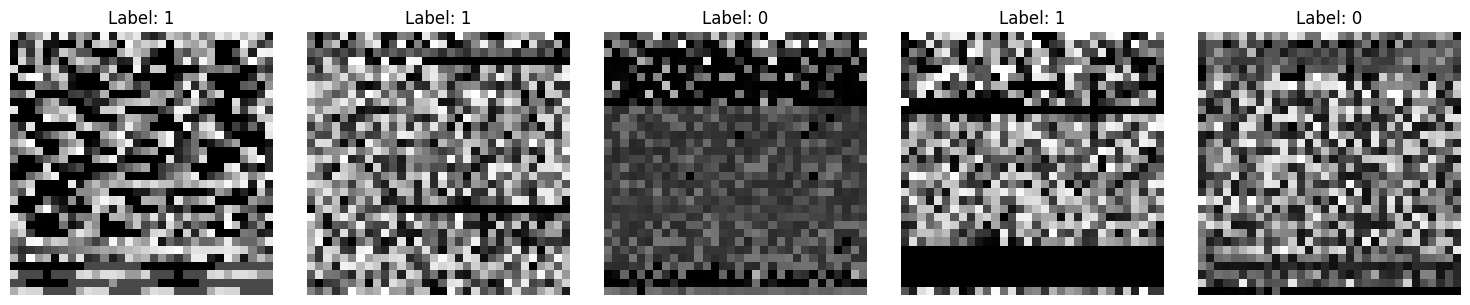

Visualizing testing images:


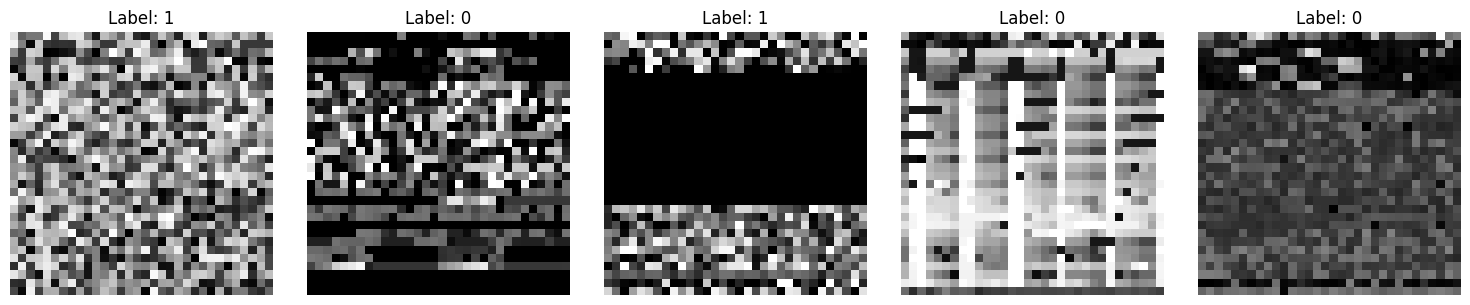

In [139]:
import matplotlib.pyplot as plt

# Visualize some of the images
def plot_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title('Label: {}'.format(labels[i]))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Visualize training images
print("Visualizing training images:")
plot_images(X_train, y_train)

# Visualize testing images
print("Visualizing testing images:")
plot_images(X_test, y_test)


In [144]:
malware_count = np.sum(y_resampled == 1)
benign_count = np.sum(y_resampled == 0)

print(f"Number of malware instances: {malware_count}")
print(f"Number of benign instances: {benign_count}")

Number of malware instances: 49376
Number of benign instances: 46907


In [108]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import class_weight
import kerastuner as kt
from keras_tuner import RandomSearch

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

def model_builder(hp):
    # Tune the number of filters in the convolutional layers
    filters_1 = hp.Int('filters_1', min_value=16, max_value=64, step=16)
    filters_2 = hp.Int('filters_2', min_value=32, max_value=128, step=32)
    filters_3 = hp.Int('filters_3', min_value=64, max_value=256, step=64)
    
    # Tune the number of units in the LSTM and Dense layer
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    dense_units = hp.Int('dense_units', min_value=64, max_value=512, step=64)
    
    # Tune the learning rate for the optimizer
    lr = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
    
    # Tune the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    # Define the model
    model = models.Sequential([
        layers.Conv2D(filters_1, (3, 3), activation='relu', input_shape=(image_size, image_size, 1), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_2, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_3, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Reshape((-1, filters_3)),  # Reshape for LSTM layer
        layers.LSTM(lstm_units, activation='tanh'),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    # Configure the optimizer
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
     
tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='output',
    project_name='lstm_cnn_malware_detection'
)

# Conduct the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), class_weight=class_weights)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and compile the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.compile(optimizer=best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data to include the channel dimension if needed
X_train = X_train.reshape(-1, image_size, image_size, 1)
X_test = X_test.reshape(-1, image_size, image_size, 1)

# Define data augmentation
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
data_generator.fit(X_train)

# Train the model
history = model.fit(data_generator.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test), class_weight=class_weights)

Trial 5 Complete [00h 08m 21s]
val_accuracy: 0.4878745377063751

Best val_accuracy So Far: 0.9678038954734802
Total elapsed time: 00h 37m 34s
Epoch 1/10
   9/1541 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.4913 - loss: 0.6939

C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1541/1541 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.8122 - loss: 0.3991 - val_accuracy: 0.6964 - val_loss: 0.6594
Epoch 2/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8991 - loss: 0.2435 - val_accuracy: 0.7104 - val_loss: 0.7606
Epoch 3/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9109 - loss: 0.2179 - val_accuracy: 0.7296 - val_loss: 0.5981
Epoch 4/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9169 - loss: 0.2039 - val_accuracy: 0.7683 - val_loss: 0.5595
Epoch 5/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9219 - loss: 0.1938 - val_accuracy: 0.7162 - val_loss: 0.7283
Epoch 6/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9272 - loss: 0.1809 - val_accuracy: 0.6995 - val_loss: 0.7517
Epoch 7/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9285 - loss: 0.1716 - val_accuracy: 0.6825 - val_loss: 0.7565
Epoch 8/10
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9306 - loss: 0.17

In [109]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Print the best hyperparameters
print("Best hyperparameters:")
print(best_hps.values)

# Compile the model
model.compile(optimizer=best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

# Checkpoint callback to save the best model
checkpoint_path = "best_modelv2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint]

# Data augmentation for training data
train_data_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

# Apply data augmentation to the training data
train_data_generator.fit(X_train)

# Data augmentation for validation data (no augmentation)
val_data_generator = ImageDataGenerator()

# Split the training data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model with data augmentation and class weights
history = model.fit(train_data_generator.flow(X_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=val_data_generator.flow(X_val, y_val, batch_size=32),
                    class_weight=class_weights,
                    callbacks=callbacks)

from tensorflow.keras.models import load_model
# Load the best model checkpoint
model = load_model(checkpoint_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Best hyperparameters:
{'filters_1': 48, 'filters_2': 32, 'filters_3': 64, 'lstm_units': 96, 'dense_units': 192, 'learning_rate': 0.001, 'optimizer': 'adam'}
Epoch 1/10
1229/1233 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7948 - loss: 0.4176
Epoch 1: val_accuracy improved from -inf to 0.63093, saving model to best_modelv2.keras
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.7951 - loss: 0.4172 - val_accuracy: 0.6309 - val_loss: 0.7162
Epoch 2/10
1232/1233 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8868 - loss: 0.2640
Epoch 2: val_accuracy improved from 0.63093 to 0.69584, saving model to best_modelv2.keras
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.8869 - loss: 0.2640 - val_accuracy: 0.6958 - val_loss: 0.6654
Epoch 3/10
1231/1233 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9052 - loss: 0.2282
Epoch 3: val_accuracy did not improve from 0.69584
1233/1233 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9052 - loss: 0.2282 - val_accuracy: 0.6921 - 

In [145]:
from tensorflow.keras.models import load_model
# Load the best model checkpoint
model = load_model(checkpoint_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8032 - loss: 0.5159
Test accuracy: 0.8016305565834045


602/602 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Confusion Matrix:
[[5700 3600]
 [ 220 9737]]


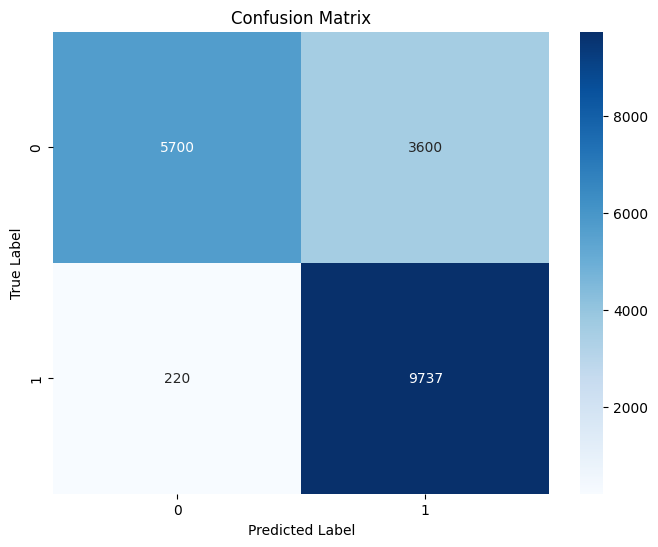

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.61      0.75      9300
           1       0.73      0.98      0.84      9957

    accuracy                           0.80     19257
   macro avg       0.85      0.80      0.79     19257
weighted avg       0.84      0.80      0.79     19257



In [146]:
# Get the predicted labels
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

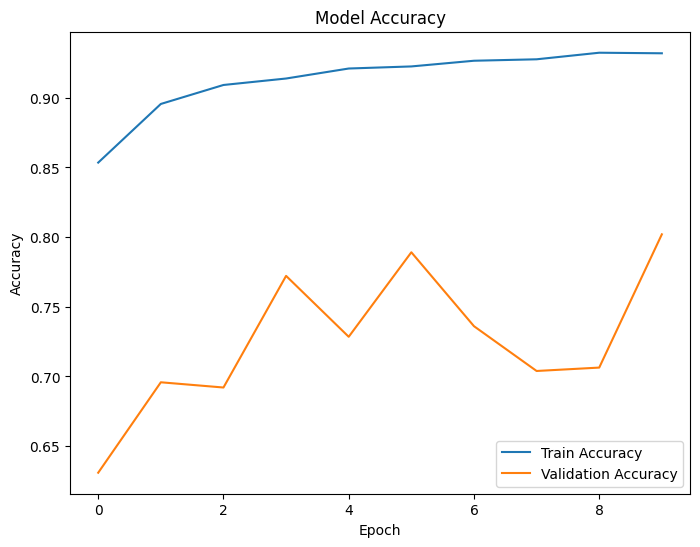

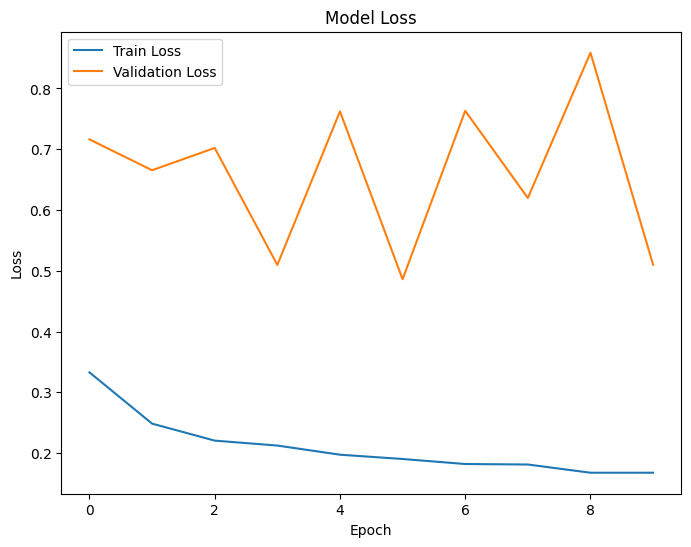

In [112]:
# Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# Load the trained model
model = load_model('best_model.keras')

def preprocess_input(image_path):
    # Load the image
    image = Image.open(image_path)
    # Resize the image to match the input shape of the model
    image = image.resize((image_size, image_size))
    # Convert the image to grayscale
    image = image.convert('L')
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Normalize the pixel values
    normalized_image = image_array / 255.0
    # Reshape the image to match the input shape of the model
    reshaped_image = normalized_image.reshape(1, image_size, image_size, 1)
    return reshaped_image

def predict_malware(image_path):
    # Preprocess the input image
    input_data = preprocess_input(image_path)
    # Make predictions using the model
    predictions = model.predict(input_data)
    # Interpret the predictions
    malware_probability = predictions[0][0]  # Probability of being malware
    if malware_probability >= 0.5:
        return 'Malware', malware_probability
    else:
        return 'Benign', 1 - malware_probability

# Path to the custom input image
custom_image_path = r'C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\MLPR\Project\Codes\dataSets\all_malware\valid\Elex\1aae1a47ca6b09c617d46b1378d3d281aa80c54fresized_image.png'

# Test the model with the custom input image
result, probability = predict_malware(custom_image_path)

# Output the results
print('Prediction:', result)
print('Probability:', probability)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: Malware
Probability: 0.98419863


In [166]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import os

# Load the trained model
model = load_model('best_model.keras')

# Define the image size expected by the model
image_size = 32

def preprocess_input(image_path):
    # Load the image
    image = Image.open(image_path)
    # Resize the image to match the input shape of the model
    image = image.resize((image_size, image_size))
    # Convert the image to grayscale
    image = image.convert('L')
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Normalize the pixel values
    normalized_image = image_array / 255.0
    # Reshape the image to match the input shape of the model
    reshaped_image = normalized_image.reshape(1, image_size, image_size, 1)
    return reshaped_image

def predict_malware(image_path):
    # Preprocess the input image
    input_data = preprocess_input(image_path)
    # Make predictions using the model
    predictions = model.predict(input_data)
    # Interpret the predictions
    malware_probability = predictions[0][0]  # Probability of being malware
    if malware_probability >= 0.5:
        return 'Malware', malware_probability
    else:
        return 'Benign', 1 - malware_probability

def evaluate_folder(folder_path):
    predictions = []
    probabilities = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            image_path = os.path.join(folder_path, filename)
            result, probability = predict_malware(image_path)
            predictions.append(result)
            probabilities.append(probability)
    
    malware_count = predictions.count('Malware')
    total_images = len(predictions)
    malware_percentage = (malware_count / total_images) * 100
    
    print("Total Images:", total_images)
    print("Malware Count:", malware_count)
    print("Malware Percentage:", malware_percentage)

# Path to the folder containing malware images
malware_folder_path = r'C:\Users\ayush\OneDrive\Desktop\Plaksha University\Semester - 4\MLPR\Project\Codes\dataSets\malevis_train_val\val\Androm'

# Evaluate the model on the entire folder
evaluate_folder(malware_folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━